In [1]:
import numpy as np

import pandas as pd




In [2]:
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
df = pd.read_csv(r"C:\Users\shiha\Downloads\cardio_train (1).csv", sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
print(df.shape) 

(70000, 13)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [6]:
df['age_years'] = (df['age'] / 365).round()


In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [8]:
import tensorflow as tf
print("TF:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))

TF: 2.20.0
GPUs: []


In [9]:
import tensorflow as tf
print("Built with CUDA support?:", tf.test.is_built_with_cuda())
print("GPUs seen by TF:", tf.config.list_physical_devices('GPU'))


Built with CUDA support?: False
GPUs seen by TF: []


In [10]:
df['BMI'] = df['weight'] / ( (df['height'] / 100) ** 2 )
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


In [46]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_cat_code
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513,1.875043
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511,0.810790
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784,-1.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115,1.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068,2.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222,3.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667,3.000000


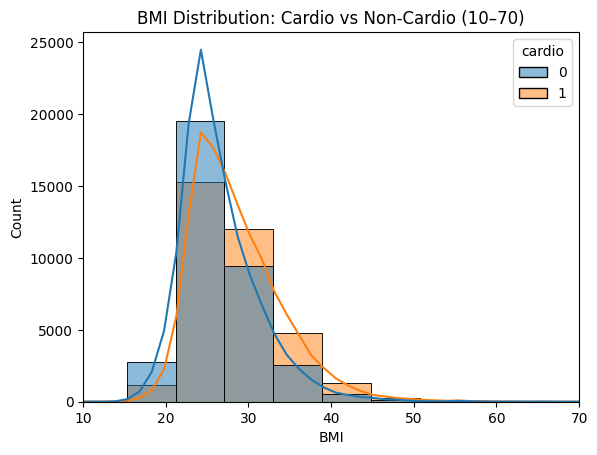

In [21]:
sns.histplot(data=df, x='BMI', hue='cardio', kde=True, bins=50)
plt.xlim(10, 70)  # Focus only on realistic BMI range
plt.title("BMI Distribution: Cardio vs Non-Cardio (10–70)")
plt.show()


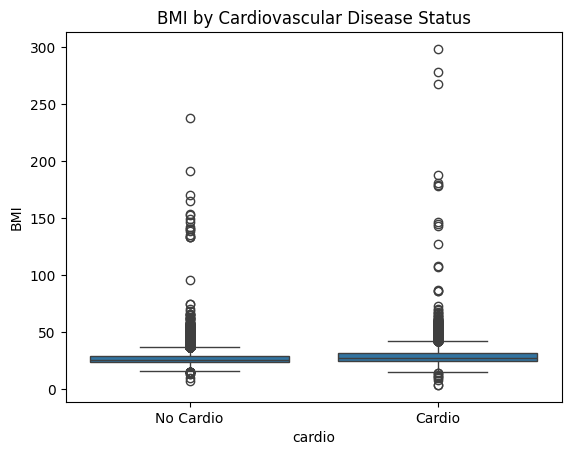

In [22]:
sns.boxplot(x='cardio', y='BMI', data=df)
plt.xticks([0,1], ['No Cardio', 'Cardio'])
plt.title("BMI by Cardiovascular Disease Status")
plt.show()


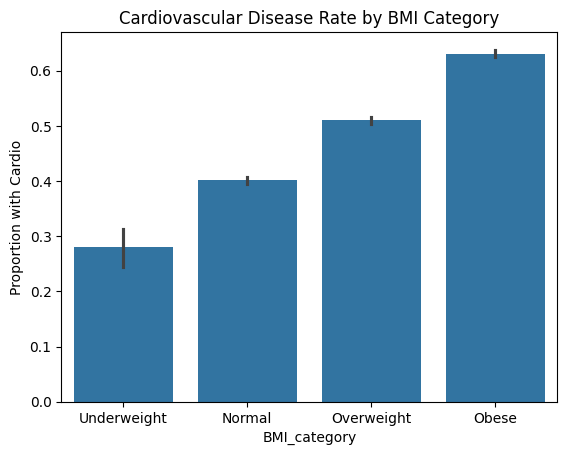

In [17]:
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

sns.barplot(x='BMI_category', y='cardio', data=df)
plt.title("Cardiovascular Disease Rate by BMI Category")
plt.ylabel("Proportion with Cardio")
plt.show()


Insight:

The chart doesn’t show raw counts (how many people total), but instead shows the risk (rate).
It tells you “if someone is obese, their chance of having cardio is much higher than if they are underweight or normal weight.”

In [19]:
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

print(df.groupby('BMI_category')['cardio'].mean())


BMI_category
Underweight    0.280000
Normal         0.401372
Overweight     0.510071
Obese          0.630991
Name: cardio, dtype: float64


C:\Users\shiha\AppData\Local\Temp\ipykernel_17332\765009863.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('BMI_category')['cardio'].mean())


In [ ]:
df_bp = df[(df['ap_hi'].between(80, 250)) & (df['ap_lo'].between(40, 150))]
#keeping the realistic blood pressure ranges as there are some extreme outliers


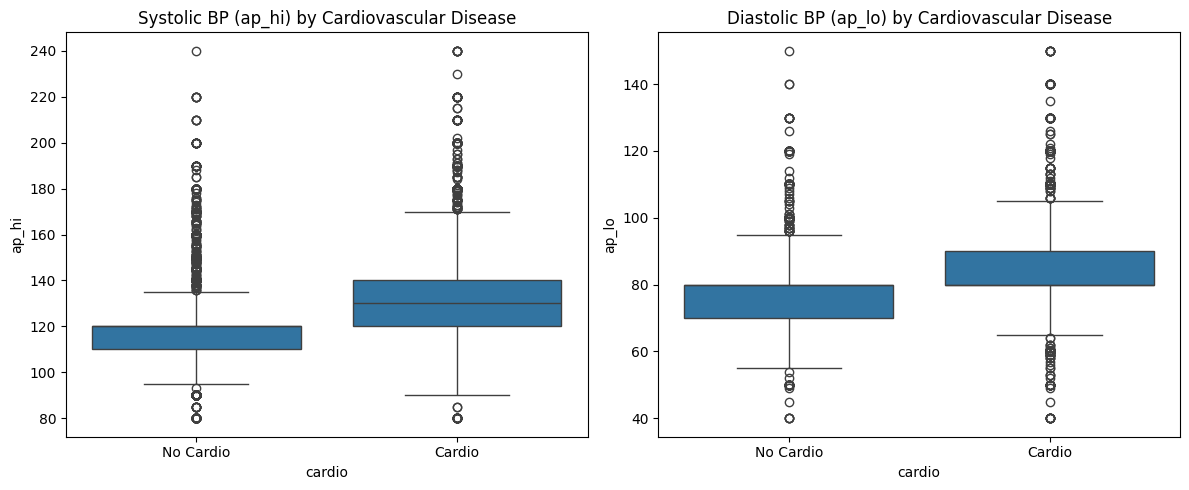

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='cardio', y='ap_hi', data=df_bp)
plt.xticks([0,1], ['No Cardio','Cardio'])
plt.title("Systolic BP (ap_hi) by Cardiovascular Disease")

plt.subplot(1,2,2)
sns.boxplot(x='cardio', y='ap_lo', data=df_bp)
plt.xticks([0,1], ['No Cardio','Cardio'])
plt.title("Diastolic BP (ap_lo) by Cardiovascular Disease")

plt.tight_layout()
plt.show()


## Lets run a blood pressure insight

In [31]:
def bp_category(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 'Normal'
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        return 'Elevated'
    elif (130 <= row['ap_hi'] < 140) or (80 <= row['ap_lo'] < 90):
        return 'Hypertension 1'
    elif row['ap_hi'] >= 140 or row['ap_lo'] >= 90:
        return 'Hypertension 2'
    else:
        return 'Other'

df_bp['BP_category'] = df_bp.apply(bp_category, axis=1)


C:\Users\shiha\AppData\Local\Temp\ipykernel_17332\1162167003.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['BP_category'] = df_bp.apply(bp_category, axis=1)


BP_category
Elevated          0.322933
Hypertension 1    0.448504
Hypertension 2    0.800895
Normal            0.221652
Name: cardio, dtype: float64


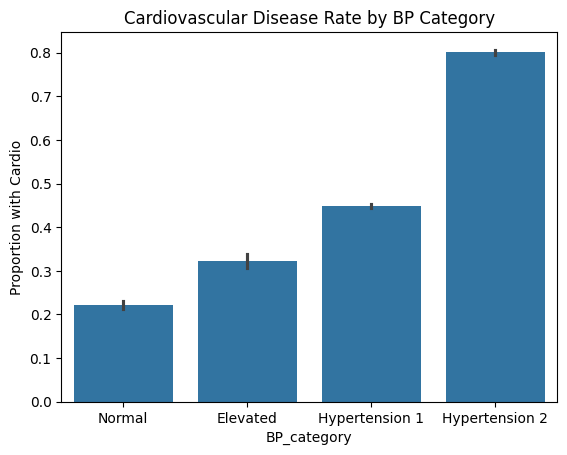

In [32]:
bp_risk = df_bp.groupby('BP_category')['cardio'].mean()
print(bp_risk)

sns.barplot(x='BP_category', y='cardio', data=df_bp, order=['Normal','Elevated','Hypertension 1','Hypertension 2'])
plt.title("Cardiovascular Disease Rate by BP Category")
plt.ylabel("Proportion with Cardio")
plt.show()


### It turns out that the more the blood pressure the more at risk of a cardiac disease.

### Lets see among overweight males and females aged 50+, what % have cardio?”

In [36]:
subset = df[
    (df['gender'] == 2) &                     # males
    (df['age_years'] >= 50) &                 # age 50+
    (df['BMI_category'] == 'Overweight')      # overweight only
]


In [37]:
cardio_rate = subset['cardio'].mean()
print(f"Cardio prevalence in overweight males 50+: {cardio_rate:.2%}")


Cardio prevalence in overweight males 50+: 57.79%


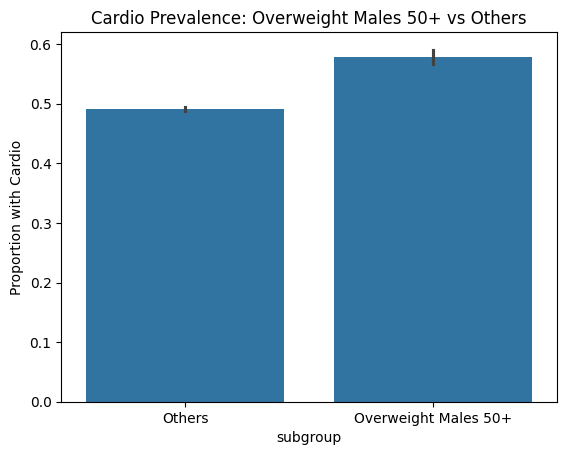

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

df['subgroup'] = 'Others'
df.loc[(df['gender']==2) & (df['age_years']>=50) & (df['BMI_category']=='Overweight'), 'subgroup'] = 'Overweight Males 50+'

sns.barplot(x='subgroup', y='cardio', data=df)
plt.title("Cardio Prevalence: Overweight Males 50+ vs Others")
plt.ylabel("Proportion with Cardio")
plt.show()


In [39]:
subset = df[
    (df['gender'] == 1) &                     # females
    (df['age_years'] >= 50) &                 # age 50+
    (df['BMI_category'] == 'Overweight')      # overweight only
]


In [43]:
cardio_rate = subset['cardio'].mean()
print(f"Cardio prevalence in overweight females 50+: {cardio_rate:.2%}")


Cardio prevalence in overweight females 50+: 53.93%


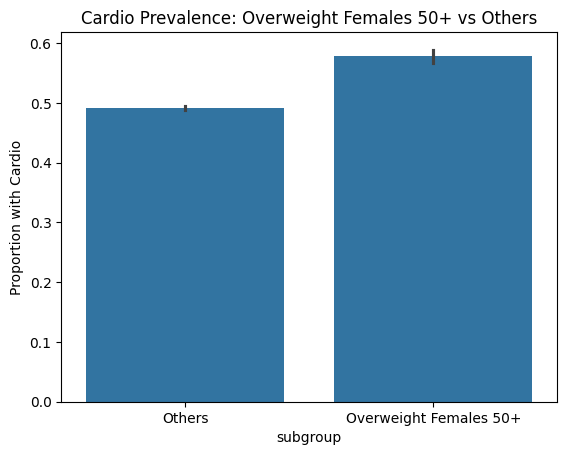

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

df['subgroup'] = 'Others'
df.loc[(df['gender']==2) & (df['age_years']>=50) & (df['BMI_category']=='Overweight'), 'subgroup'] = 'Overweight Females 50+'

sns.barplot(x='subgroup', y='cardio', data=df)
plt.title("Cardio Prevalence: Overweight Females 50+ vs Others")
plt.ylabel("Proportion with Cardio")
plt.show()


## Lets run a correlational Heatmap

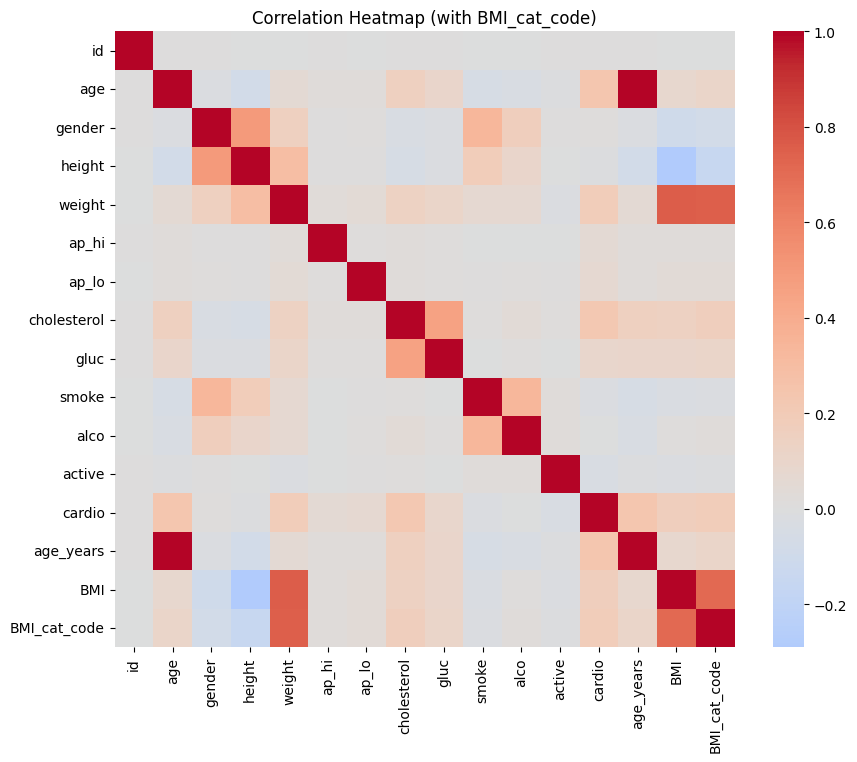

In [26]:
df['BMI_cat_code'] = df['BMI_category'].cat.codes   # -1 means NaN/not binned

num_df = df.select_dtypes(include='number')
corr   = num_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (with BMI_cat_code)")
plt.show()


Color scale:

Red- Positive correlation (as one increases, the other tends to increase).

Blue- Negative correlation (as one increases, the other tends to decrease).

White/grey- Near 0, no strong linear relationship.

Insights:

Top predictors of cardio: age, cholesterol, BMI.

Gender doesn’t strongly correlate. 

Lifestyle factors (smoke, alcohol, active) don’t show much signal here.

Outlier cleanup: We probably have some outliers which we need to clean for finding stronger patterns.

## Lets run a Age BMI Cardio insight

In [48]:
bins = [30, 40, 50, 60, 70]
labels = ['30-39','40-49','50-59','60-69']

df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)


In [49]:
print(df['BMI_category'].value_counts())


BMI_category
Normal         25804
Overweight     25073
Obese          18444
Underweight      650
Name: count, dtype: int64


In [50]:
risk_table = df.groupby(['age_group','BMI_category'])['cardio'].mean().unstack()
print(risk_table)


BMI_category  Underweight    Normal  Overweight     Obese
age_group                                                
30-39            0.100000  0.127168    0.223022  0.406593
40-49            0.149798  0.270579    0.387168  0.522403
50-59            0.323636  0.409809    0.502061  0.628125
60-69            0.466102  0.588557    0.668744  0.729658


C:\Users\shiha\AppData\Local\Temp\ipykernel_17332\2620149467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_table = df.groupby(['age_group','BMI_category'])['cardio'].mean().unstack()


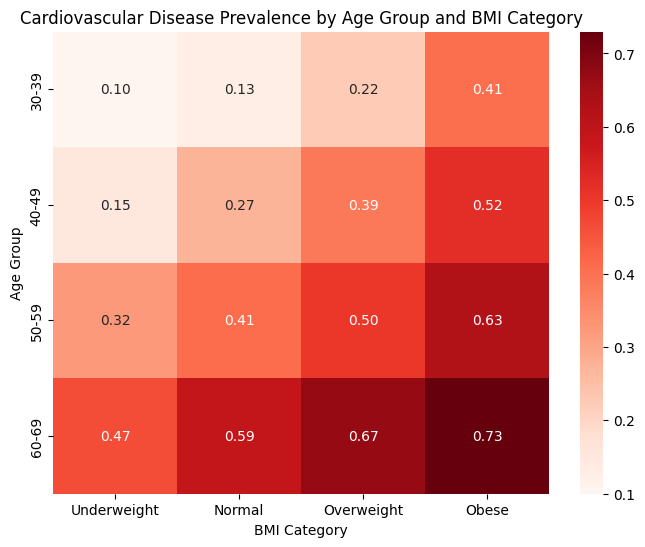

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(risk_table, annot=True, cmap="Reds", fmt=".2f")
plt.title("Cardiovascular Disease Prevalence by Age Group and BMI Category")
plt.ylabel("Age Group")
plt.xlabel("BMI Category")
plt.show()


In [52]:
risk_matrix = df.groupby(['cholesterol','gluc'])['cardio'].mean().unstack()
print(risk_matrix)


gluc                1         2         3
cholesterol                              
1            0.434911  0.539150  0.461434
2            0.604547  0.595736  0.601050
3            0.821236  0.813953  0.692684


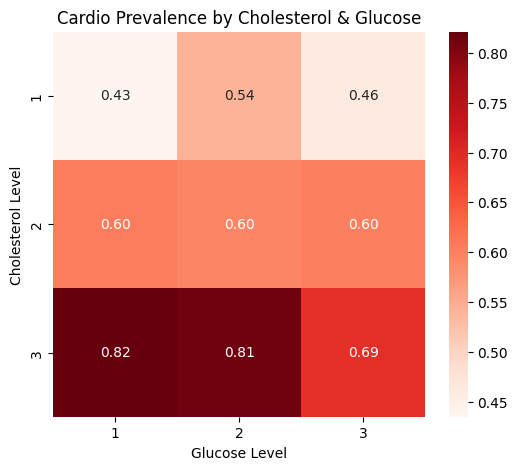

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(risk_matrix, annot=True, cmap="Reds", fmt=".2f")
plt.title("Cardio Prevalence by Cholesterol & Glucose")
plt.ylabel("Cholesterol Level")
plt.xlabel("Glucose Level")
plt.show()


Cholesterol is the strongest driver here. The jump from Chol=1 to Chol=3 more than doubles risk.

Glucose adds extra risk, but the effect is smaller compared to cholesterol.

The highest risk group: people with Chol=3 & Gluc=1/2 → over 80% have cardiovascular disease.

The lowest risk group: people with Chol=1 & Gluc=1 → ~43% have disease.

Lets do a active smoke and alco insight

In [54]:
df['lifestyle'] = df.apply(
    lambda row: f"{'Active' if row['active']==1 else 'Inactive'}-" +
                f"{'Smoker' if row['smoke']==1 else 'NonSmoker'}-" +
                f"{'Alco' if row['alco']==1 else 'NoAlco'}", axis=1
)


In [55]:
risk_lifestyle = df.groupby('lifestyle')['cardio'].mean().sort_values(ascending=False)
print(risk_lifestyle)


lifestyle
Inactive-Smoker-NoAlco       0.554483
Inactive-Smoker-Alco         0.553191
Inactive-NonSmoker-NoAlco    0.534620
Active-NonSmoker-Alco        0.523249
Inactive-NonSmoker-Alco      0.521886
Active-NonSmoker-NoAlco      0.493129
Active-Smoker-NoAlco         0.474373
Active-Smoker-Alco           0.424936
Name: cardio, dtype: float64


C:\Users\shiha\AppData\Local\Temp\ipykernel_17332\3526646182.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_lifestyle.index, y=risk_lifestyle.values, palette="Set2")


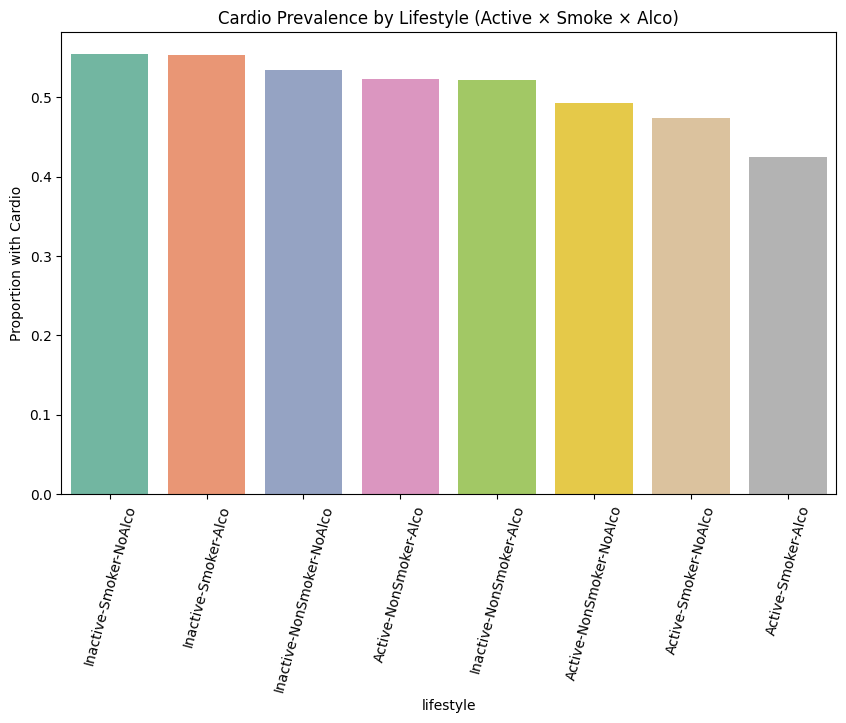

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=risk_lifestyle.index, y=risk_lifestyle.values, palette="Set2")
plt.xticks(rotation=75)
plt.ylabel("Proportion with Cardio")
plt.title("Cardio Prevalence by Lifestyle (Active × Smoke × Alco)")
plt.show()
